## TensorFlow 2.x MNIST Classification with DNN (Only Dense Layers)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout, BatchNormalization, GaussianNoise
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)) / 255.0 
test_images = test_images.reshape((10000, 28*28)) / 255.0

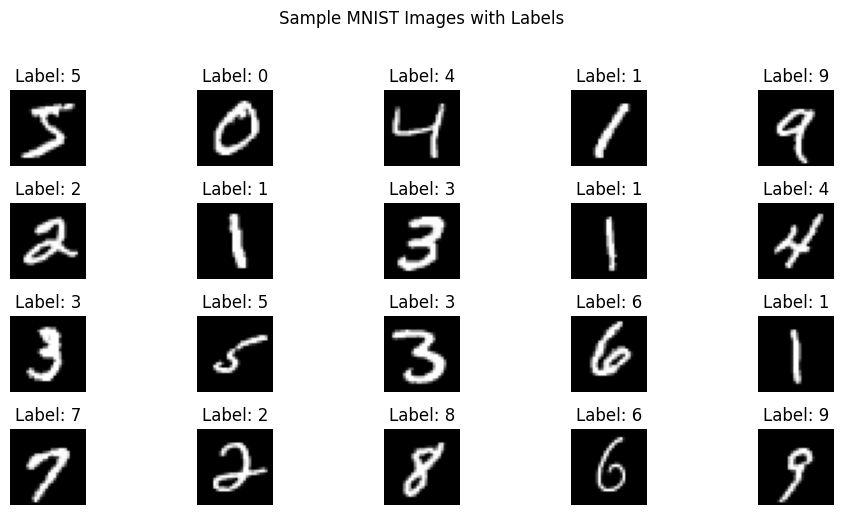

In [3]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.tight_layout()
plt.show()

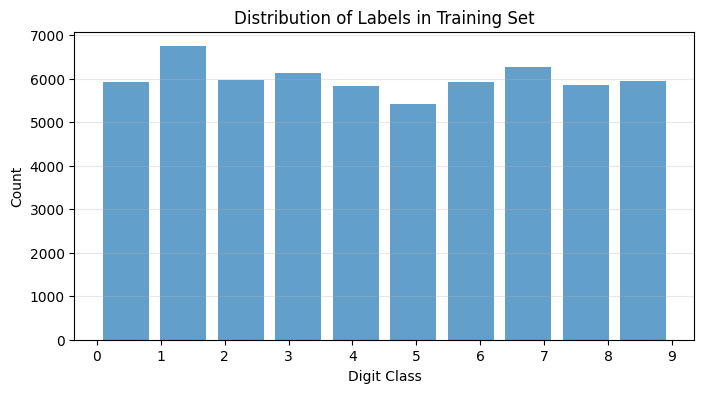

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [5]:
model = models.Sequential([
    layers.GaussianNoise(0.1),
    layers.Dense(784, activation='relu', input_shape=(28*28,)),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    
    layers.Dense(2048, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

c:\Users\Achintya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
lr_schedule = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
callbacks=[early_stop, lr_schedule]
history = model.fit(train_images, 
                    train_labels, 
                    epochs=60, 
                    batch_size=128,
                    validation_data=(test_images, test_labels), 
                    callbacks=callbacks
                    )

Epoch 1/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9919 - loss: 0.0246 - val_accuracy: 0.9888 - val_loss: 0.0392 - learning_rate: 5.0000e-04
Epoch 2/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9913 - loss: 0.0248 - val_accuracy: 0.9889 - val_loss: 0.0386 - learning_rate: 5.0000e-04
Epoch 3/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9918 - loss: 0.0262 - val_accuracy: 0.9895 - val_loss: 0.0382 - learning_rate: 5.0000e-04
Epoch 4/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9901 - val_loss: 0.0387 - learning_rate: 5.0000e-04
Epoch 5/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9918 - loss: 0.0245 - val_accuracy: 0.9884 - val_loss: 0.0406 - learning_rate: 5.0000e-04
Epoch 6/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9885 - val_loss: 0.0416 - learning_rate: 5.0000e-04
Epoch 7/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/ste

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9875 - loss: 0.0506

Test accuracy: 0.9901


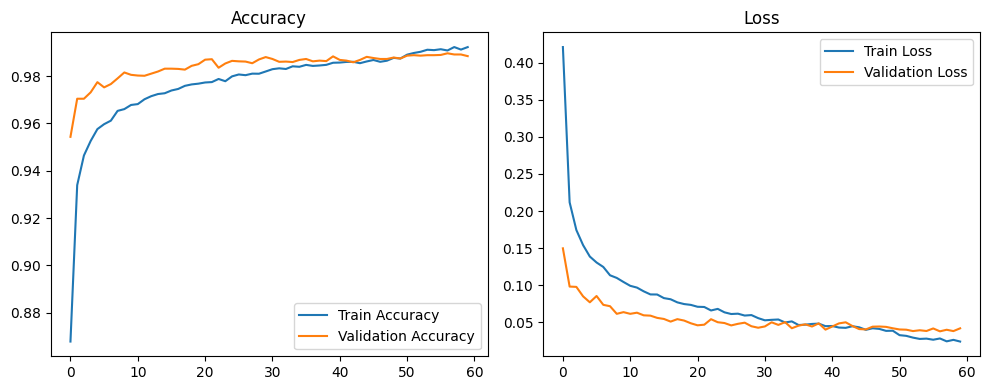

In [9]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


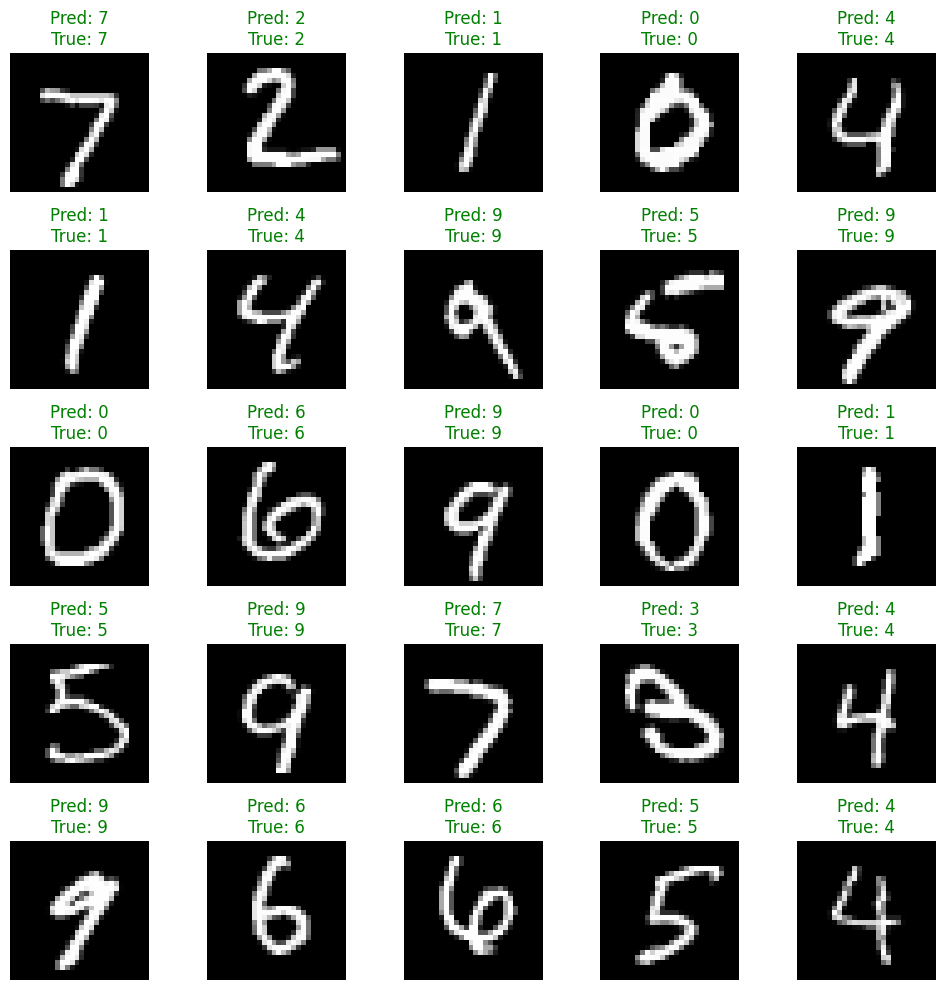

In [10]:
# Make predictions and visualize
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()